In [1089]:
# Importing libraries and setting initial system configurations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #plotting
import warnings
%matplotlib inline
# Setting floating point precision to 2 digits
pd.options.display.float_format = '{:.2f}'.format 

# Setting flag to ignore warnings
warnings.filterwarnings('ignore')

# Data Assessment

In [1090]:
# Reading csv and loading it in panda's dataframe

loan_df = pd.read_csv('loan.csv')

# Determining rows x columns using shape attribute
print(loan_df.shape)

(39717, 111)


In [1091]:
# Using head() to print top 5 rows

loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


# Data Cleaning

#### First we will find null rows and columns and then get rid of them

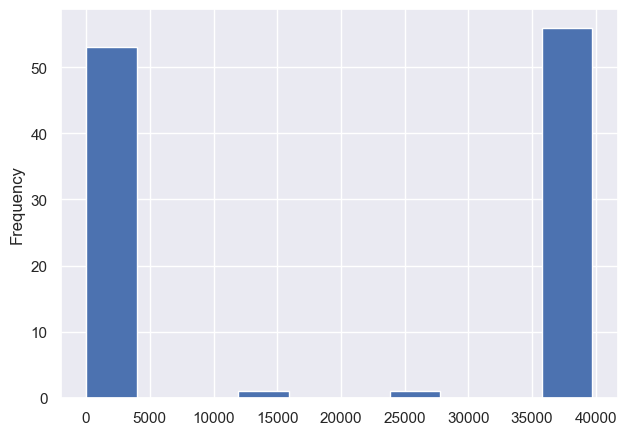

In [1092]:
nullValues_tmp = loan_df.isnull().sum()
nullValues_tmp.plot(kind='hist')
plt.show()

#### Data above shows a lot of null columns. We will drop them before proceeding with Exploratory Data Analysis

In [1093]:
# Removing column with 50% or more null values as it will reduce the impact on analysis
loan_df = loan_df.loc[:,loan_df.isnull().sum()/loan_df.shape[0]*100<50]
# Shape of the dataframe after removing columns
print(loan_df.shape)

(39717, 54)


Columns with unique values can be dropped as they don't add to analysis.
For example, column pymnt_plan contains only one value "n". We can identify & filter all such columns using the code below:

In [1094]:
# Getting unique value details
loan_unique_cols_tmp = loan_df.nunique()
print(loan_unique_cols_tmp)

# Filtering columns where the value is 1
unique_cols_to_drop_tmp = loan_unique_cols_tmp[loan_unique_cols_tmp.values == 1]
unique_cols_to_drop_tmp.index

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [1095]:
### Dropping unique columns
loan_df.drop(columns = list(unique_cols_to_drop_tmp.index), inplace=True)
loan_df.shape

(39717, 45)

In [1096]:
#Printing loan data frame columns names after dropping unique columns
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

Finally columns which are not relevant for the analysis can be determined by taking a closer look at the data.
Columns such as member_id, url, emp_title, zip_code are not useful for this analysis. Similarly columns such as 
last_pymnt_d, last_pymnt_amnt etc which are filled after the loan has been granted can't be used as inputs.
So, let's drop those columns:

In [1097]:
# Listing out the columns which are not relevant for analysis
cols_to_drop_tmp = ["id","member_id","title","desc","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d", "delinq_2yrs","earliest_cr_line","inq_last_6mths",
            "open_acc","revol_bal","revol_util","total_acc"]
loan_df.drop(columns=cols_to_drop_tmp, inplace=True)
loan_df.shape

(39717, 20)

In [1098]:
# Columns left after dropping unnecessary columns
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec',
       'pub_rec_bankruptcies'],
      dtype='object')

Since we want to find out the likelihood of loan getting defaulted (at pre-approval stage),
those rows where loan_status is current won't be useful. We can get rid of those data points

In [1099]:
# Getting count of loan_status
print(loan_df['loan_status'].value_counts())

#Filter rows where loan_status == 'Current'

loan_df = loan_df[~(loan_df['loan_status'] == 'Current')]

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


# Data Preparation

In [1100]:
### Converting int_rate to numeric value

loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: pd.to_numeric(x.replace('%','')))
loan_df['int_rate'].describe()

count   38577.00
mean       11.93
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.38
max        24.40
Name: int_rate, dtype: float64

Employment length may also be analysed to understand if it has any relationship with loan default. 
But before we can analyse it, we need to convert it to numeric value.

In [1101]:
### Converting loan_status to numeric value
loan_df['loan_status_flag'] = loan_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [1102]:
#Fixing emp_length column
loan_df["emp_length"].fillna('0',inplace=True)
loan_df["emp_length"]=loan_df.emp_length.str.extract('(\d+)')
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies,loan_status_flag
0,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10,...,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.00,0
1,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,1,...,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0.00,1
2,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10,...,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0.00,0
3,10000,10000,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0.00,0
5,5000,5000,5000.00,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,...,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0.00,0


In [1103]:
# Stripping off "months" from term column, so that it can be converted to numeric value
loan_df["term"]=loan_df.term.str.extract('(\d+)')
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec,pub_rec_bankruptcies,loan_status_flag
0,5000,5000,4975.00,36,10.65,162.87,B,B2,NaN,10,...,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,0.00,0
1,2500,2500,2500.00,60,15.27,59.83,C,C4,Ryder,1,...,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,0.00,1
2,2400,2400,2400.00,36,15.96,84.33,C,C5,NaN,10,...,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,0.00,0
3,10000,10000,10000.00,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,0.00,0
5,5000,5000,5000.00,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,0.00,0


In [1104]:
# Set correct data type for numeric columns

numeric_cols_tmp = ['emp_length','loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti', 'term','loan_status_flag']
loan_df[numeric_cols_tmp] = loan_df[numeric_cols_tmp].apply(pd.to_numeric)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  int64  
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            38577 non-null  int64  
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose               38

#### Sub_grades are prefixed with their respective grades. We can strip off the grade prefix to make it a numeric column

In [1105]:
# Removing text values by extracting only the numeric values using regex \d+
loan_df["sub_grade"] = loan_df.sub_grade.str.extract('(\d+)')

# Outlier Treatment

#### We will draw various charts to visually sense the presence of outliers in various columns.
#### Further we will checkin the quantile info before taking appropriate action

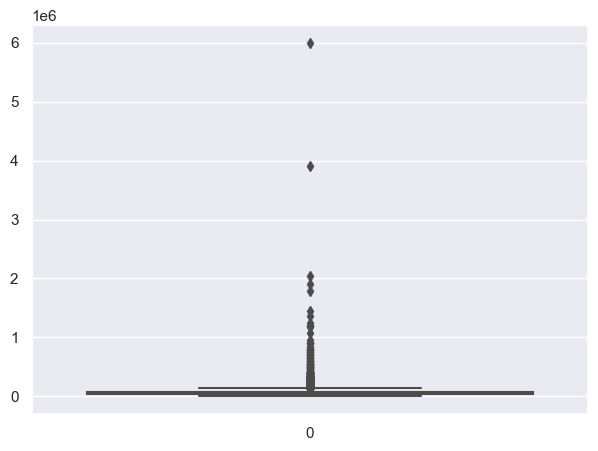

In [1106]:
# Determining presence of outliers in annual_inc

sns.boxplot(loan_df['annual_inc'])
px.box(loan_df,x='annual_inc', title='Annual Income Distribution',labels={'annual_inc':'Annual Income'})
plt.show()

Above output clearly shows presence of outliers in annual_inc column. Values above 95 percentile can be removed as clearly visible from the above charts.

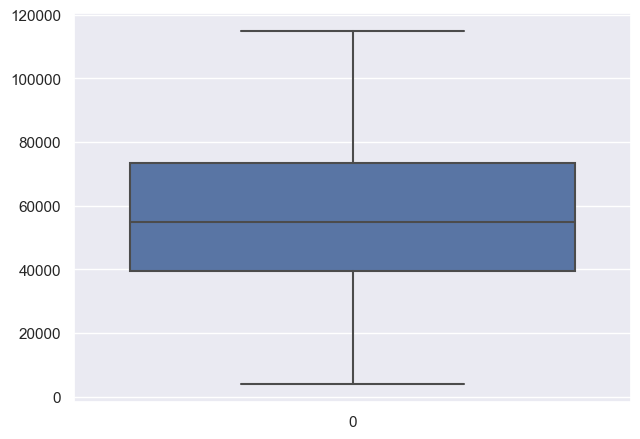

In [1107]:
#Filter data which falls outside 95 percentile and verify once again
loan_df = loan_df[loan_df.annual_inc <= loan_df['annual_inc'].quantile(0.90)]
sns.boxplot(loan_df['annual_inc'])
px.box(loan_df,x='annual_inc', title='Annual Income Distribution',labels={'annual_inc':'Annual Income'})
plt.show()

Now the above charts show no outliers for annual_inc column

# Exploratory Data Analysis

#### Purpose of loan may have an impact on getting it into default list, so let's examine the values contained in that column

In [1108]:
# Getting how many loans were disbursed for which purpose

loan_df.purpose.value_counts()*100/len(loan_df)

purpose
debt_consolidation   47.48
credit_card          12.95
other                10.21
home_improvement      6.66
major_purchase        5.61
small_business        4.35
car                   4.00
wedding               2.43
medical               1.75
moving                1.49
vacation              1.01
house                 0.92
educational           0.88
renewable_energy      0.26
Name: count, dtype: float64

Observation:- From the above output, it is clear that close to 50% loans are taken for **debt consolidation**.
The next major head is **credit card**.

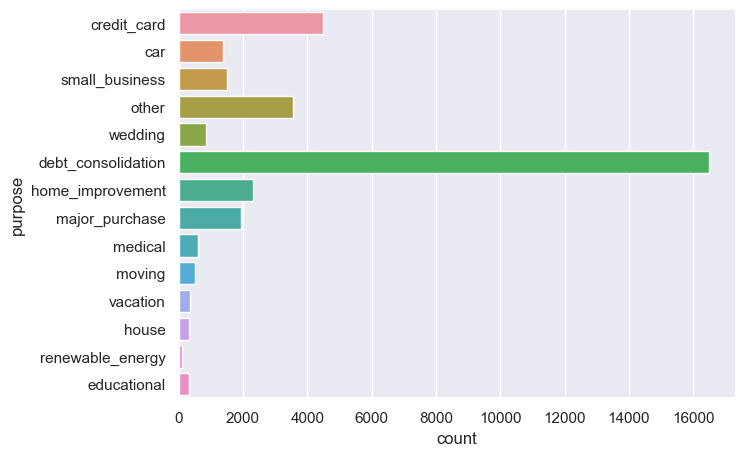

In [1109]:
#Plotting the trend on chart

sns.countplot(y = 'purpose', data = loan_df)
plt.show()

#### Finding how many loans were charged off vs how many of them were fully paid off

In [1110]:
#Let's see what percentage of loans were "Charged Off"

print(loan_df['loan_status'].value_counts() * 100 / len(loan_df))

loan_status
Fully Paid    85.03
Charged Off   14.97
Name: count, dtype: float64


Observation:- It is clear from above output that nearly **14%** loans were charged off.

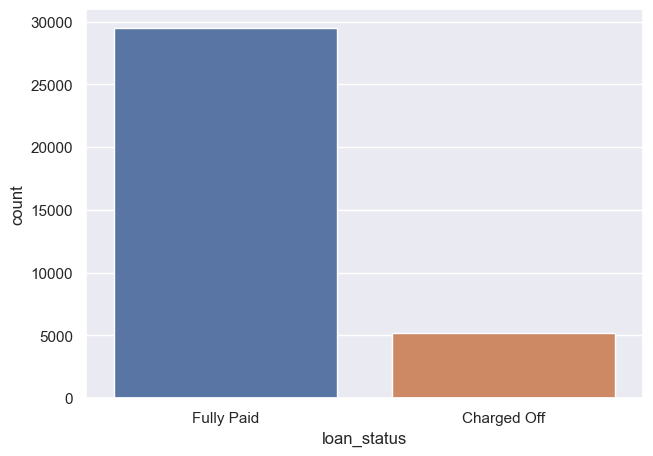

In [1111]:
sns.countplot(x = 'loan_status', data = loan_df)
plt.show()

#### Grade wise loan distribution

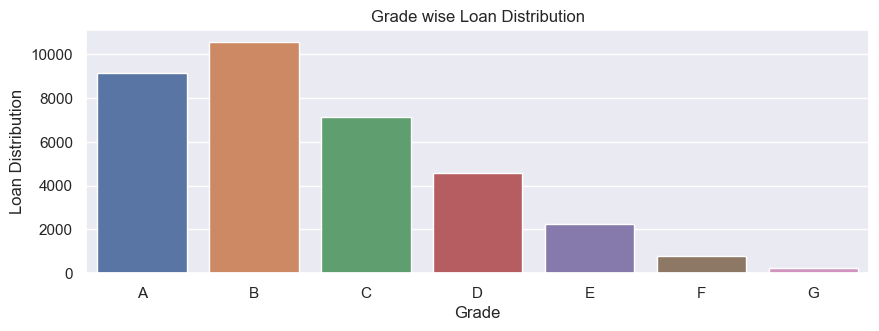

In [1112]:
# Setting plot size
plt.figure(figsize=(9,3))

# Setting up parameters for drawing Grade graph
sns.countplot(x = 'grade', data = loan_df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.xlabel('Grade')
plt.ylabel('Loan Distribution')
plt.title('Grade wise Loan Distribution')
plt.show()

Observation:-  From the above chart it is clear that most of the loans belonged to Grade A & Grade B. We can also find out the Grades of Charged Off Loans only

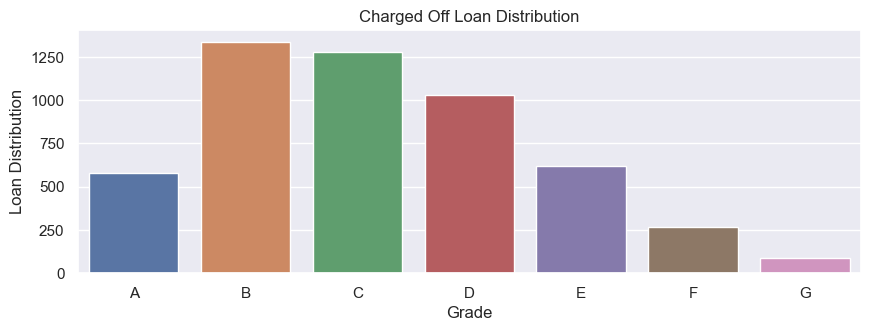

In [1113]:
# Setting plot size
plt.figure(figsize=(9,3))

# Setting up parameters for drawing Grade graph only for rows where loan_status is Charged Off
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.xlabel('Grade')
plt.ylabel('Loan Distribution')
plt.title('Charged Off Loan Distribution')
plt.show()

Observation:- It seems that most of the charged off loans belonged to Grade B & Grade C followed by Grade D

#### Interest Rate wise loan distribution

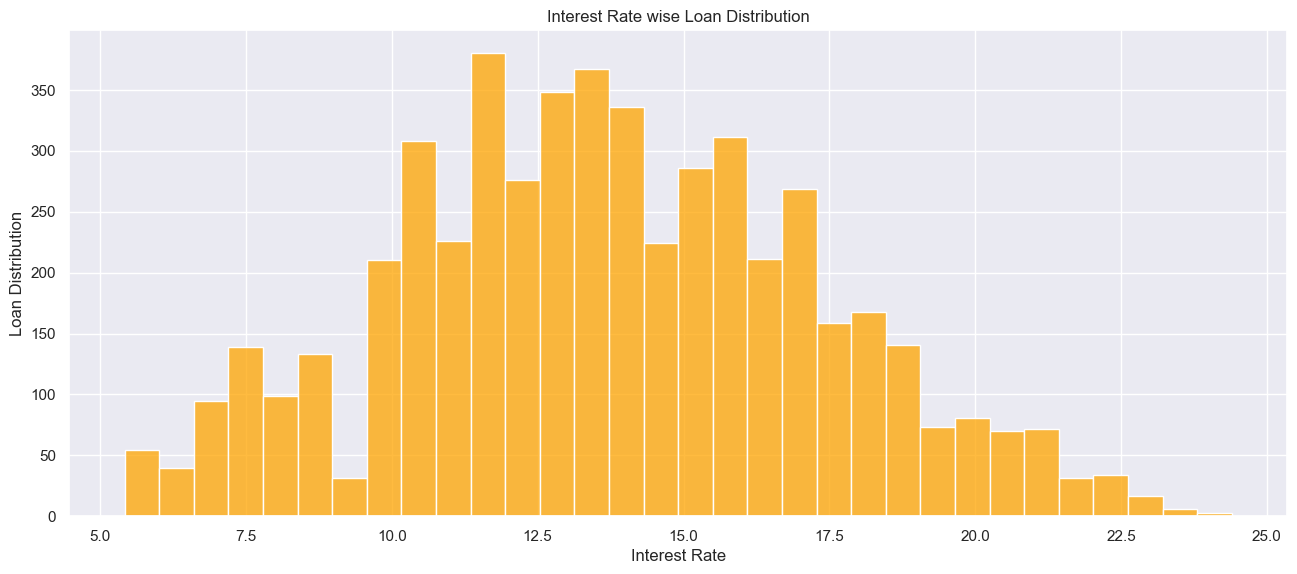

In [1114]:
# Setting plot size
plt.figure(figsize=(14,6))

# Setting up parameters for drawing int_rate graph only for rows where loan_status is Charged Off
sns.histplot(x = 'int_rate', data = loan_df[loan_df.loan_status == 'Charged Off'],color='orange', edgecolor='white')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Distribution')
plt.title('Interest Rate wise Loan Distribution')
plt.show()

Observation:- The graph indicates that loans taken at higher interest rates are more likely to default

#### Home ownership wise Charged Off loan distribution

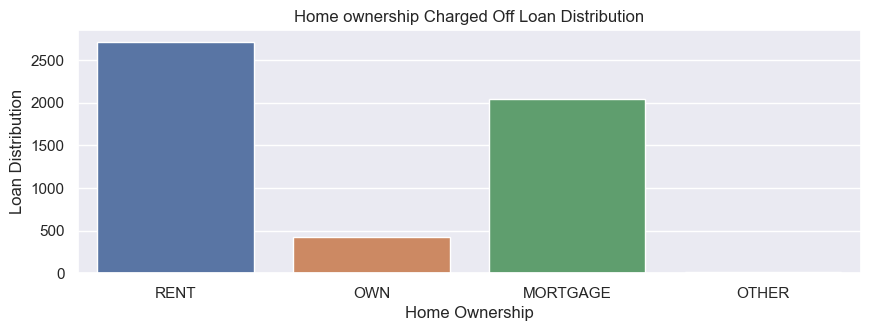

In [1115]:
# Setting plot size
plt.figure(figsize=(9,3))

# Setting up parameters for drawing home_ownership graph only for rows where loan_status is Charged Off
sns.countplot(x = 'home_ownership', data = loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Home Ownership')
plt.ylabel('Loan Distribution')
plt.title('Home ownership Charged Off Loan Distribution')
plt.show()

Observation:- People who live in Rented accommodation or have their homes mortgaged are more likely to default.

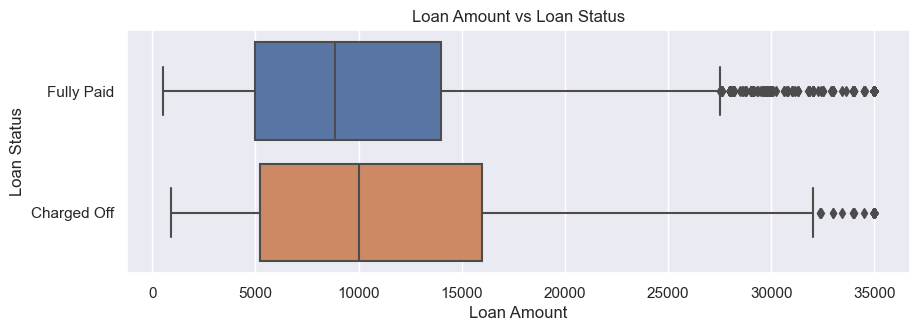

In [1116]:
# Setting plot size
plt.figure(figsize=(9,3))

# Distribution of loan_amnt based on loan_status
sns.boxplot(data=loan_df,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Loan Amount vs Loan Status')
plt.show()

Observation:- It can be inferred from the above graph that if the loan amount is higher, chances of default are more.

#### Analyzing Monthly Income for Charged off loans. We will first create income groups (bins)

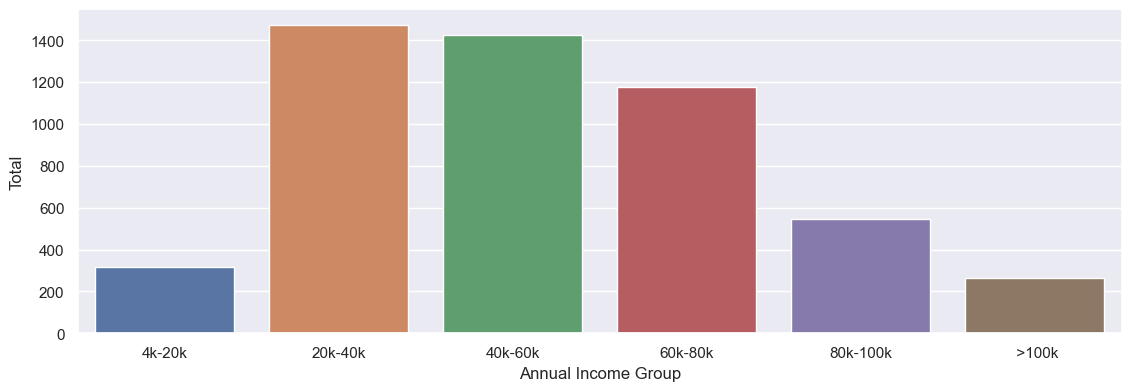

In [1117]:
# Creating 6 groups for annual_inc
loan_df['annual_inc_groups'] = pd.cut(loan_df['annual_inc'], bins=6,precision =0,labels =['4k-20k','20k-40k','40k-60k','60k-80k','80k-100k',' >100k'])

# Drawing graph with annual_inc_grups data
fig, ax = plt.subplots(figsize = (12,4))
sns.countplot(x='annual_inc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Annual Income Group')
plt.ylabel('Total')
plt.show()

Observation:- Maximum loan charge off happened in the annual income group ranging from 20k to 60k. Higher the annual income, lesser the default

#### Verification status vs Loan Status

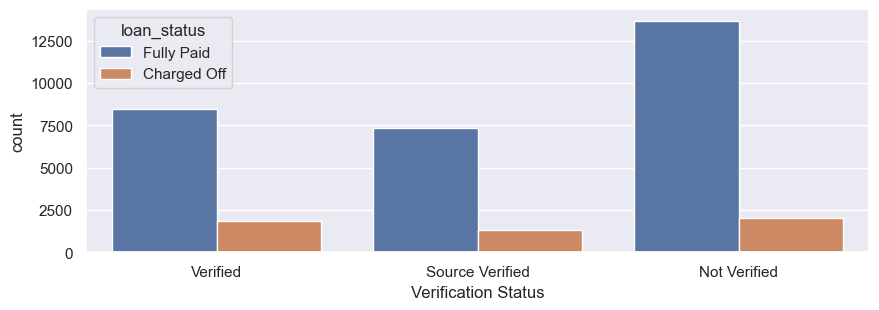

In [1118]:
# Setting plot size
plt.figure(figsize=(9,3))

# Setting up graph parameters for displaying Effect of verification status on loan status
sns.countplot(data =loan_df,x='verification_status', hue ='loan_status',palette="deep")
plt.xlabel('Verification Status')
plt.show()

Observation:- Not verified loans default the max. However, there are large number of verified loans also which have defaulted. Lending company needs to improve its verification process.

#### Anlayzing Loan Default rate with respect to loan term


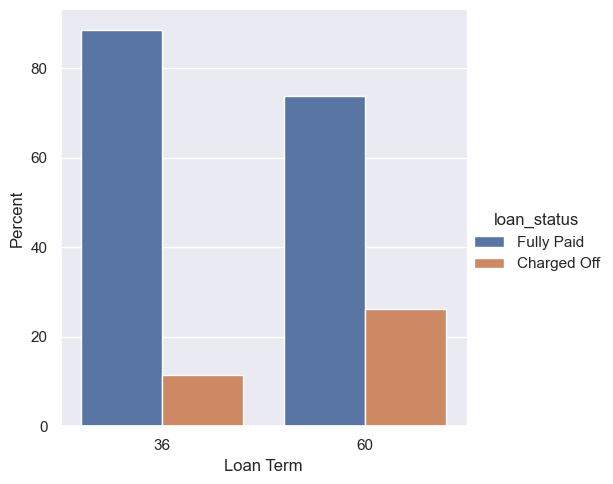

In [1119]:
# Grouping loan_status by term column. Obviously if there are more number of loans given for say 36 months, 
# the count of default may also be more. That can be misleading. So we will try to find the percentage of loans
# that defaulted for each of the terms, and then we will conduct the analysis.
new_df_tmp = loan_df.groupby('term')['loan_status'].value_counts(normalize=True)
new_df_tmp = new_df_tmp.mul(100).rename('Percent').reset_index()
sns.catplot(x='term', y='Percent', hue='loan_status', kind='bar', data=new_df_tmp)
plt.xlabel('Loan Term')
plt.show()

Observation:- Loans given for longer terms are more likely to get charged off.

#### Maximum loan default as per addr_state
Here we are interested in finding out the top 10 states where the loan default rate is the highest.

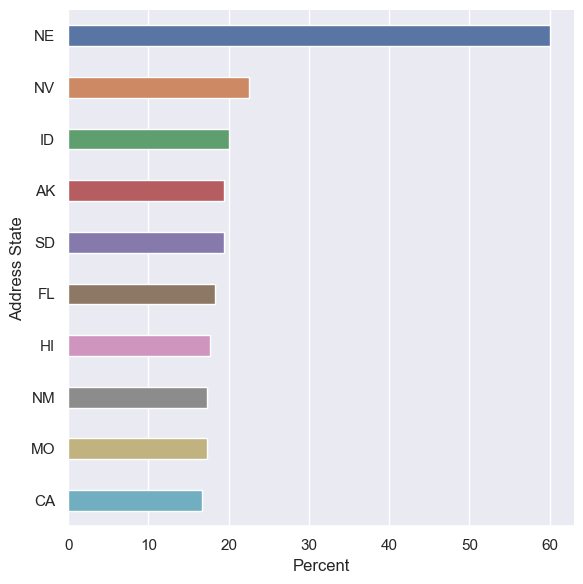

In [1120]:
# Grouping by addr_state for loan_status Charged Off.
new_df_tmp = loan_df.groupby('addr_state')['loan_status'].value_counts(normalize=True)
new_df_tmp = new_df_tmp.mul(100).rename('Percent').reset_index()
new_df_tmp = new_df_tmp[new_df_tmp['loan_status'] == 'Charged Off']

# There are large number of states. Finding data for the states where maximum default happens shall be our target.
# Instead of finding it for all the states, we will only focus on top 10 states with max default rate.
new_df_tmp = new_df_tmp.nlargest(10, "Percent")

sns.catplot(x='Percent', y='addr_state', kind='bar', data=new_df_tmp,height=6, aspect=1, width=0.4)
sns.set(font_scale = 1)
plt.ylabel('Address State', fontsize=12)
plt.xlabel('Percent',fontsize=12)
plt.show()

Observation:- Maximum loan default comes from states : NE, NV, ID, SD, AK, FL

#### Analyzing distribution of loan_status against pub_rec_bankruptcies

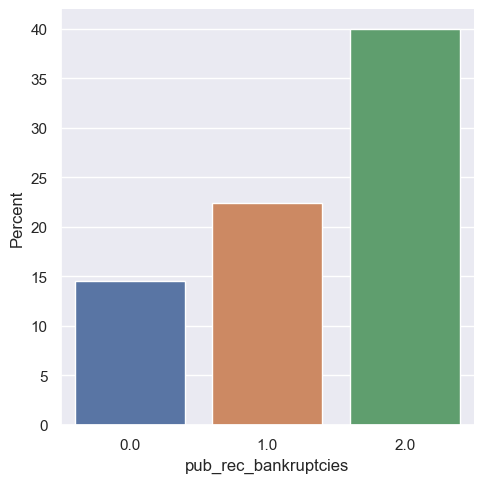

In [1121]:
# Grouping by pub_rec_bankruptcies for loan_status Charged Off.
new_df_tmp = loan_df.groupby('pub_rec_bankruptcies')['loan_status'].value_counts(normalize=True)
new_df_tmp = new_df_tmp.mul(100).rename('Percent').reset_index()
new_df_tmp = new_df_tmp[new_df_tmp['loan_status'] == 'Charged Off']
sns.catplot(x='pub_rec_bankruptcies', y='Percent', kind='bar', data=new_df_tmp)
plt.show()

Observation:- Higher the public records for bankruptcies, greater is the risk of loan default

#### Effect of Loan Amount on Loan Status

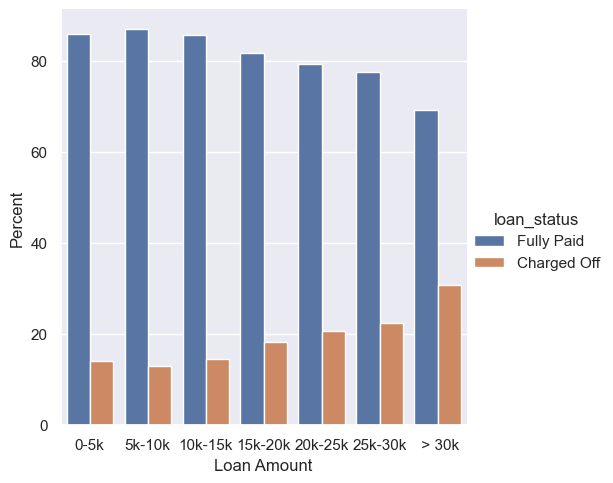

In [1122]:
# For continuous data like loan_amnt, first we will create groups.
loan_df['loan_amnt_groups'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k',' > 30k'])

# Now for loan_amnt_groups, we will find loan_status percentage.
new_df_tmp = loan_df.groupby('loan_amnt_groups')['loan_status'].value_counts(normalize=True)
new_df_tmp = new_df_tmp.mul(100).rename('Percent').reset_index()
sns.catplot(x='loan_amnt_groups', y='Percent', hue='loan_status', kind='bar', data=new_df_tmp)
plt.xlabel('Loan Amount')
plt.show()

Observation:- Likelihood of loan default increases with loan amount.

#### DTI vs Loan Status

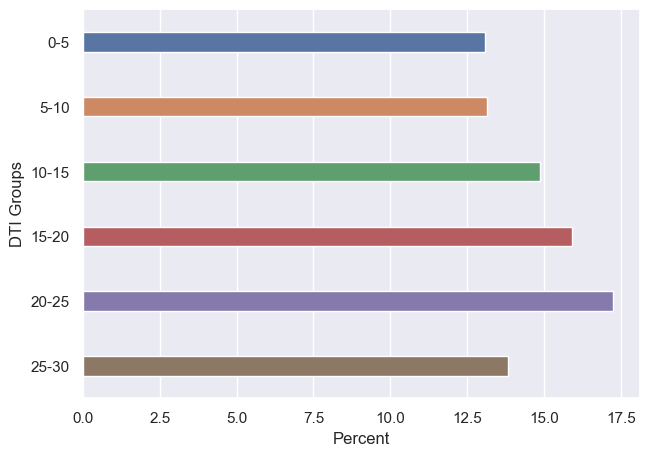

In [1123]:
# For continuous data like dti, first we will create groups.

loan_df['dti_groups'] = pd.cut(loan_df['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-25', '25-30'])
new_df_tmp = loan_df.groupby('dti_groups')['loan_status'].value_counts(normalize=True)
new_df_tmp = new_df_tmp.mul(100).rename('Percent').reset_index()

# Plotting the values calculated above
sns.barplot(y='dti_groups', x='Percent', width=0.3, orient='h', data=new_df_tmp[new_df_tmp['loan_status'] == 'Charged Off'])
plt.xlabel('Percent')
plt.ylabel('DTI Groups')
plt.show()

Observation:- Increase in Debt to Income ratio may lead to higher default rate

#### Employment Length vs Loan Status

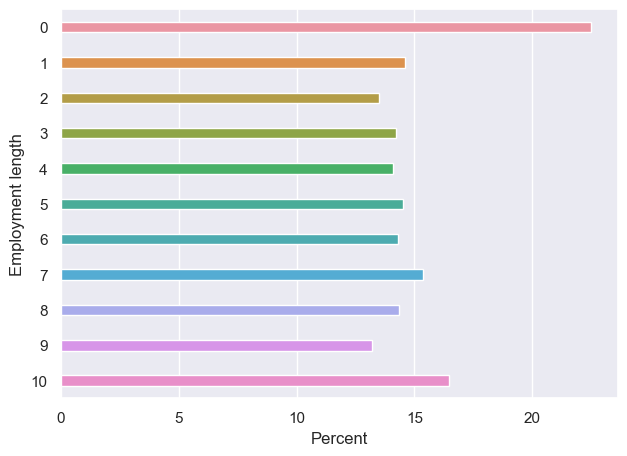

In [1124]:
# Calculating % of loans distributed across various emp_length
new_df_tmp = loan_df.groupby('emp_length')['loan_status'].value_counts(normalize=True)
new_df_tmp = new_df_tmp.mul(100).rename('Percent').reset_index()

# Drawing bar graph to represent data pertaining to Charged Off loans
sns.barplot(y='emp_length', x='Percent', width=0.3, orient='h', data=new_df_tmp[new_df_tmp['loan_status'] == 'Charged Off'])
plt.xlabel('Percent')
plt.ylabel('Employment length')
plt.show()

Observation:- Unknown Employment Duration is where the default happens the most. Loan default is also high where emp_length is 10 or more number of years.

#### Analysis of Grade & Interest Rate

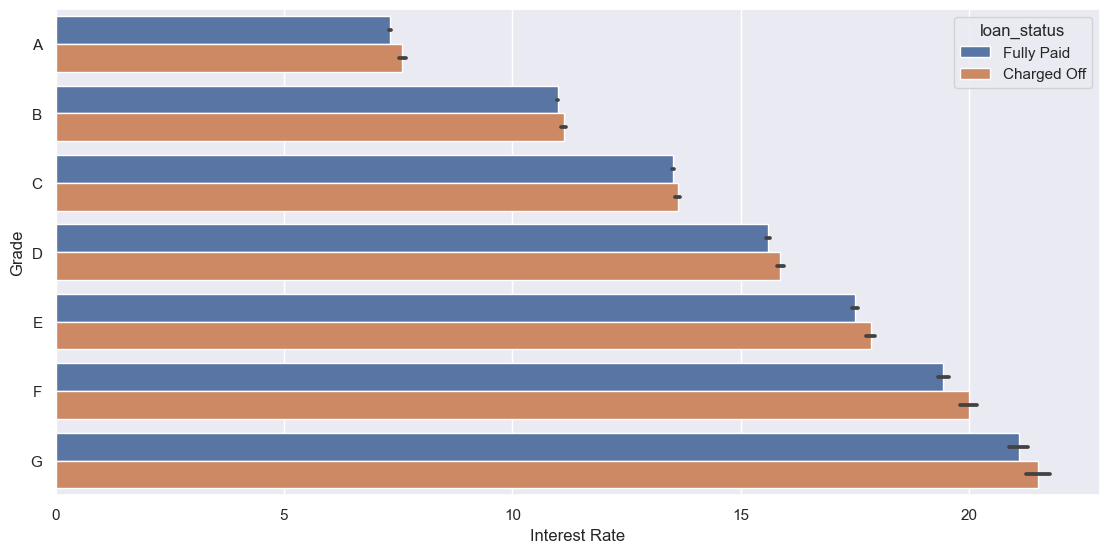

In [1125]:
# Impact of Grade and Interest Rate together on loan_status
plt.figure(figsize=(12,6))
sns.barplot(data=loan_df,x='int_rate',y='grade', order = ['A','B','C','D','E','F','G'], hue='loan_status')
plt.ylabel('Grade')
plt.xlabel('Interest Rate')
plt.show()

Observation:- As the Grade & Interest Rate increases, Charged Off loan rate increases as well

#### Analyzing loan charge off rate with respect to purpose

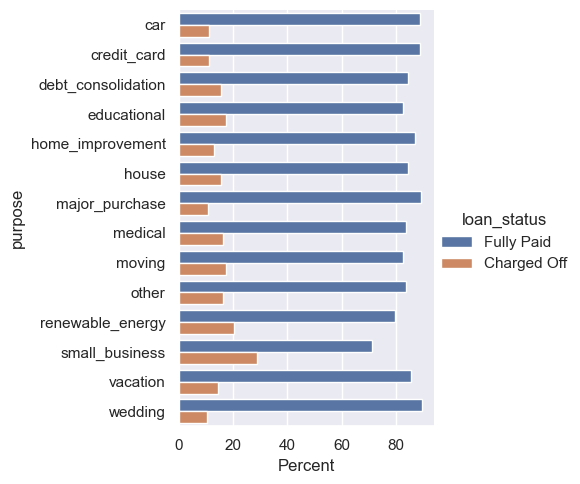

In [1126]:
#Finding loan_status percentage for various stated purposes.
new_df_tmp = loan_df.groupby('purpose')['loan_status'].value_counts(normalize=True)
new_df_tmp = new_df_tmp.mul(100).rename('Percent').reset_index()

sns.catplot(x='Percent', y='purpose', hue='loan_status', kind='bar', data=new_df_tmp)
plt.xlabel('Percent')
plt.show()

Observation:- Small Business loans are more likely to get charged off

#### Understanding relationship between rate of interest and loan purpose

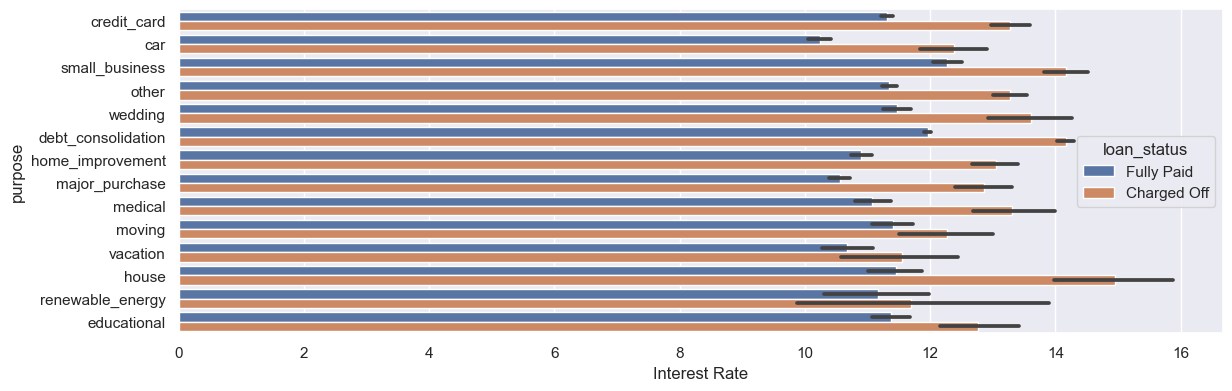

In [1127]:
# Finding int_rate and purpose on loan_status
plt.figure(figsize=(12,4))
sns.barplot(data =loan_df,y='purpose', x='int_rate',hue ='loan_status',palette="deep")
plt.xlabel('Interest Rate')
plt.show()

Observation:- Small business and House purpose loans were given at very high interest rates, which led to high percentage of default. Interest rate has huge impact on loan default.

In [1128]:
# Defining method to draw heatmaps for various bivariate analysis

def Draw_HeatMap (x_axis, y_axis, figsize=(12,4)):
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=loan_df, values='loan_status_flag', index=y_axis, columns=x_axis)
    sns.heatmap(pt, ax=ax)
    plt.show()

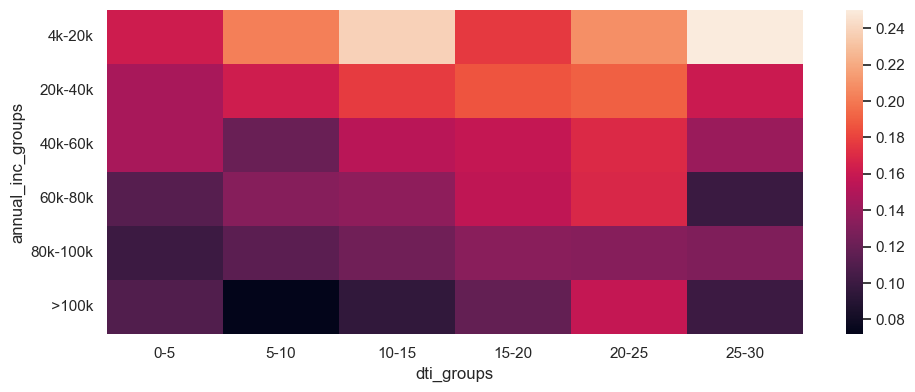

In [1129]:
# dti_groups & annual_inc_groups heatmap
Draw_HeatMap(x_axis='dti_groups', y_axis='annual_inc_groups', figsize=(10,4))


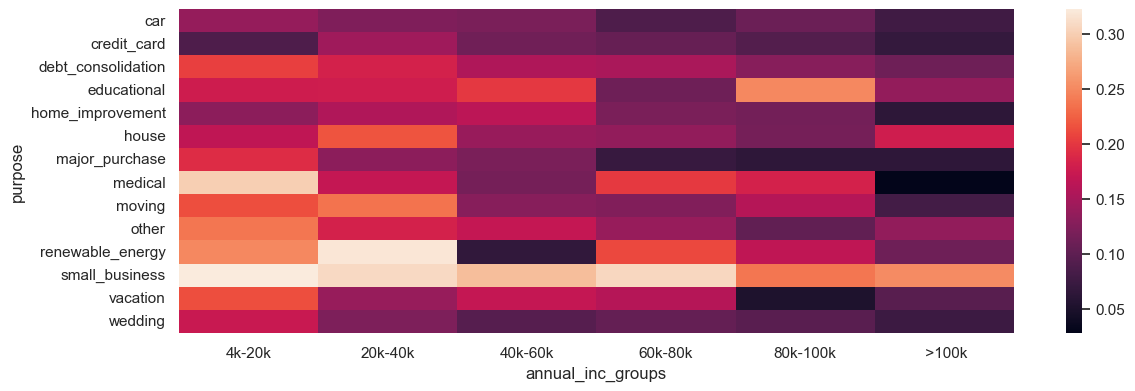

In [1130]:
# annual_inc_groups and purpose heatmap
Draw_HeatMap(x_axis='annual_inc_groups', y_axis='purpose')

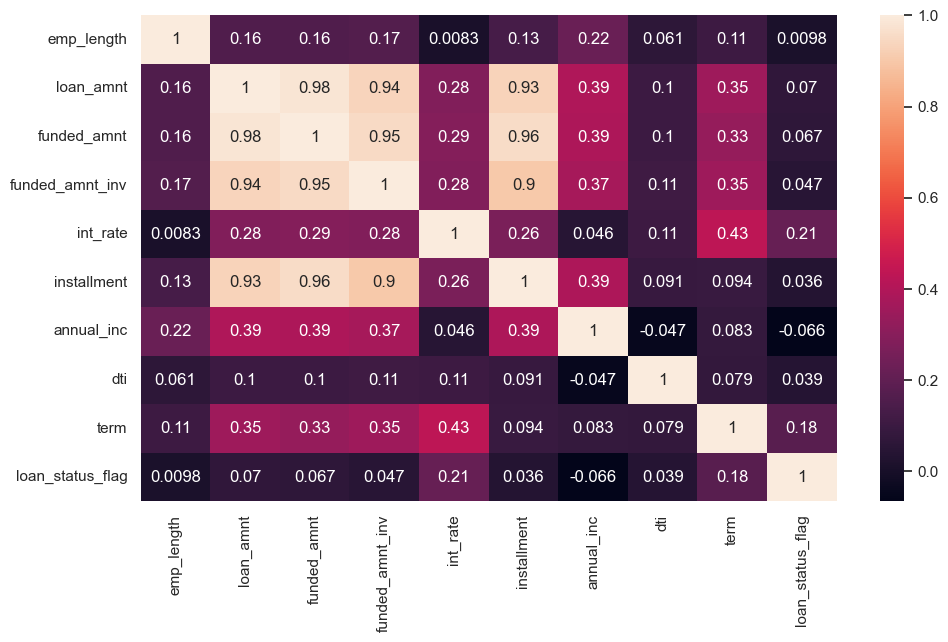

In [1131]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,6))
sns.heatmap(loan_df[numeric_cols_tmp].corr(),annot=True)
plt.show()